### HuggingFace中的其他常用管线

In [20]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# 导入diffusers组件
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionDepth2ImgPipeline
)
import torch

In [ ]:
# 设备
device = "cuda" if torch.cuda.is_available() else "cpu"

### Image2Image：图像到图像的转换

In [ ]:
# 载入Img2Img管线
model_id = "stabilityai/stable-diffusion-2-1-base"
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id,revision='fp16',torch_dtype=torch.float16).to(device)

In [ ]:
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

In [ ]:
# 定义一个打开图片的函数，并将返回的字节通过PIL显示出来
def open_image(path):
    response = open(path, 'rb')
    img = Image.open(BytesIO(response.read())).convert('RGB')
    return img

In [ ]:
init_image = open_image("./data/overture-creations-5sI6fQgYIuo.png")

In [ ]:
# 使用Image2Image管线进行图片生成
result = img2img_pipe(
    prompt = "An oil painting of a man on a bench",
    image = init_image,
    strength = 0.6
).images[0]

In [ ]:
# 显示Image2Image管线生成的图片
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(result);axs[1].set_title('Result')

### Inpainting：利用掩膜对图像进行变换

In [ ]:
model_id = "runwayml/stable-diffusion-inpainting"

In [ ]:
model_id

In [ ]:
inpainting_pipe = StableDiffusionInpaintPipeline.from_pretrained(model_id,revision='fp16',torch_dtype=torch.float16).to(device)

In [ ]:
mask = open_image("./data/overture-creations-5sI6fQgYIuo_mask.png")

In [ ]:
prompt = "A small robot,high resolution,sitting on a park bench"
image = inpainting_pipe(
    prompt = prompt,
    image = init_image,
    mask_image = mask
).images[0]

In [ ]:
# 显示Inpainting管线生成的图片
fig,axs = plt.subplots(1,3,figsize=(16,5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(mask);axs[1].set_title('Mask')
axs[2].imshow(image);axs[2].set_title('Result')

### Depth2Image：利用深度信息生成图像

In [21]:
model_id = "stabilityai/stable-diffusion-2-depth"

In [28]:
depth2image_pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(model_id).to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [30]:
# 使用提示字文字进行图像补全
prompt = "An oil painting of a man on a bench"
image = depth2image_pipe(
    prompt = prompt,
    image = init_image,
).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Result')

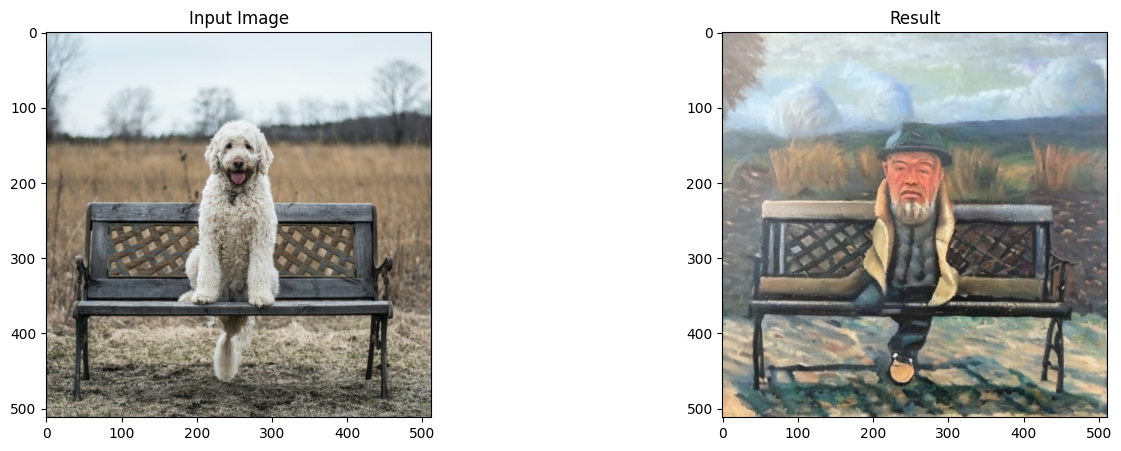

In [31]:
# 查看结果
fig,axs = plt.subplots(1,2,figsize=(16,5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(image);axs[1].set_title('Result')